### This is a demo for artpop for showing a color magnitude diagram of a *simple* composite stellar population with magnitude in I band versus V-I as axes, and finding the magnitude of the TRGB (last cell is the answer).

In [6]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u 
import seaborn as sns
import scipy

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'HST_WFC3'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]
mass = (8 ** (9)) * u.Msun

print(artpop.filters.get_filter_names(phot_system='HST_WFC3'))

['WFC3_UVIS_F200LP', 'WFC3_UVIS_F218W', 'WFC3_UVIS_F225W', 'WFC3_UVIS_F275W', 'WFC3_UVIS_F280N', 'WFC3_UVIS_F300X', 'WFC3_UVIS_F336W', 'WFC3_UVIS_F343N', 'WFC3_UVIS_F350LP', 'WFC3_UVIS_F373N', 'WFC3_UVIS_F390M', 'WFC3_UVIS_F390W', 'WFC3_UVIS_F395N', 'WFC3_UVIS_F410M', 'WFC3_UVIS_F438W', 'WFC3_UVIS_F467M', 'WFC3_UVIS_F469N', 'WFC3_UVIS_F475W', 'WFC3_UVIS_F475X', 'WFC3_UVIS_F487N', 'WFC3_UVIS_F502N', 'WFC3_UVIS_F547M', 'WFC3_UVIS_F555W', 'WFC3_UVIS_F600LP', 'WFC3_UVIS_F606W', 'WFC3_UVIS_F621M', 'WFC3_UVIS_F625W', 'WFC3_UVIS_F631N', 'WFC3_UVIS_F645N', 'WFC3_UVIS_F656N', 'WFC3_UVIS_F657N', 'WFC3_UVIS_F658N', 'WFC3_UVIS_F665N', 'WFC3_UVIS_F673N', 'WFC3_UVIS_F680N', 'WFC3_UVIS_F689M', 'WFC3_UVIS_F763M', 'WFC3_UVIS_F775W', 'WFC3_UVIS_F814W', 'WFC3_UVIS_F845M', 'WFC3_UVIS_F850LP', 'WFC3_UVIS_F953N', 'WFC3_IR_F098M', 'WFC3_IR_F105W', 'WFC3_IR_F110W', 'WFC3_IR_F125W', 'WFC3_IR_F126N', 'WFC3_IR_F127M', 'WFC3_IR_F128N', 'WFC3_IR_F130N', 'WFC3_IR_F132N', 'WFC3_IR_F139M', 'WFC3_IR_F140W', 'WFC3_IR_F

We then use the make composite stellar population using 3 SSPs:

In [7]:
ssp_old = artpop.MISTSSP(
    log_age = 10,       # log of age in years
    feh = -1.5,           # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 2e7,      # number of stars
    random_state = rng,   # random state for reproducibility
    ab_or_vega = 'vega'
)
RGB_old = ssp_old.select_phase('RGB')
AGB_old = ssp_old.select_phase('AGB')
TPAGB_old = ssp_old.select_phase('TPAGB')
PAGB_old = ssp_old.select_phase('postAGB')

ssp_intermediate = artpop.MISTSSP(
    log_age = 9.11,        # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 1e7,      # number of stars
    random_state = rng,   # random state for reproducibility
    ab_or_vega = 'vega'
)
RGB_intermediate = ssp_intermediate.select_phase('RGB')
AGB_intermediate = ssp_intermediate.select_phase('AGB')
TPAGB_intermediate = ssp_intermediate.select_phase('TPAGB')
PAGB_intermediate = ssp_intermediate.select_phase('postAGB')

ssp_young = artpop.MISTSSP(
    log_age = 8.20 ,        # log of age in years
    feh = 0,              # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 4e6,      # number of stars
    random_state = rng,   # random state for reproducibility
    ab_or_vega = 'vega'
)
RGB_young = ssp_young.select_phase('RGB')
AGB_young = ssp_young.select_phase('AGB')
TPAGB_young = ssp_young.select_phase('TPAGB')
PAGB_young = ssp_young.select_phase('postAGB')

In [8]:
# HST bands
# Get the magnitude for different filters/bandpass
F814_old = ssp_old.star_mags('WFC3_UVIS_F814W')
F606_old = ssp_old.star_mags('WFC3_UVIS_F606W')

F814_intermediate = ssp_intermediate.star_mags('WFC3_UVIS_F814W')
F606_intermediate = ssp_intermediate.star_mags('WFC3_UVIS_F606W')

F814_young = ssp_young.star_mags('WFC3_UVIS_F814W')
F606_young = ssp_young.star_mags('WFC3_UVIS_F606W')


We now try to find the Center of the AGB with J-K vs J:

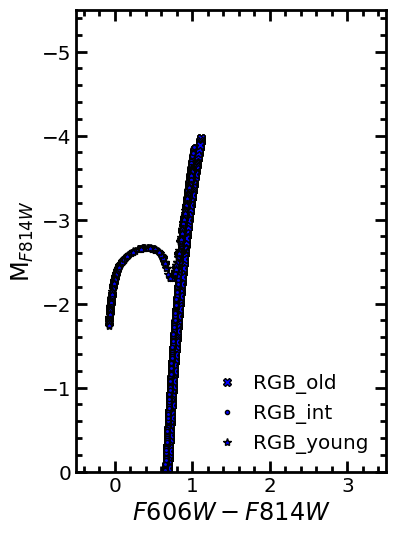

In [9]:
# plot J-K - J for AGB

plt.figure(figsize=(4, 6), dpi=100)

# plt.plot(F606_old[AGB_old] - F814_old[AGB_old], F814_old[AGB_old], 'X', 
#          c='red', label='AGB_old', mec='k')
# plt.plot(F606_intermediate[AGB_intermediate] - F814_intermediate[AGB_intermediate], F814_intermediate[AGB_intermediate], '.', 
#          c='red', label='AGB_int', mec='k')
# plt.plot(F606_young[AGB_young] - F814_young[AGB_young], F814_young[AGB_young], '*', 
#          c='red', label='AGB_young', mec='k')

plt.plot(F606_old[RGB_old] - F814_old[RGB_old], F814_old[RGB_old], 'X', 
         c='blue', label='RGB_old', mec='k')
plt.plot(F606_intermediate[RGB_intermediate] - F814_intermediate[RGB_intermediate], F814_intermediate[RGB_intermediate], '.', 
         c='blue', label='RGB_int', mec='k')
plt.plot(F606_young[RGB_young] - F814_young[RGB_young], F814_young[RGB_young], '*', 
         c='blue', label='RGB_young', mec='k')


# y_y, x_y = F606_young[AGB_young] - F814_young[AGB_young], F814_young[AGB_young]
# y_i, x_i = F606_intermediate[AGB_intermediate] - F814_intermediate[AGB_intermediate], F814_intermediate[AGB_intermediate]
# y_o, x_o = F606_old[AGB_old] - F814_old[AGB_old], F814_old[AGB_old]

# res = scipy.stats.linregress(x_y,y_y)
# plt.plot(res.intercept + res.slope*x_y, x_y, 'r', label='fitted line')

# mag_cut_i = np.all([x_i>-5.65, x_i<-4.85], axis=0)
# color_cut_i = np.all([y_i > res.intercept + res.slope*x_i+0.01], axis=0)
# mag_cut_o = np.all([x_o>-5.65, x_o<-4.85], axis=0)
# color_cut_o = np.all([y_o > res.intercept + res.slope*x_o+0.01], axis=0)

# color = np.concatenate((y_i[np.all([mag_cut_i, color_cut_i], axis=0)], y_o[np.all([mag_cut_o, color_cut_o], axis=0)]))
# mag = np.concatenate((x_i[np.all([mag_cut_i, color_cut_i], axis=0)], x_o[np.all([mag_cut_o, color_cut_o], axis=0)]))
# plt.plot(color, mag, '.', c='green', label='JAGB', mec='k')



plt.xlim(-0.5,3.5)
plt.ylim(-5.5,0)
plt.legend(loc=4)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$F606W-F814W$')
plt.ylabel(r'M$_{F814W}$');


In [10]:
# sns.histplot(data = mag, bins = 10, kde= True)
# print('Average mag of JRGB =', np.average(mag))